### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

### Reading the data from both the csv files.

In [2]:
movie_metadata = pd.read_csv('data/movies_metadata.csv')
mpst_data = pd.read_csv('data/mpst_full_data.csv')

/home/patidar/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
movie_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
mpst_data.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


### Merging both mpst and movies_metadata files based on imdb_id to get our final dataset

In [5]:
dataset = pd.merge(movie_metadata , mpst_data, on='imdb_id')
dataset.shape

(11387, 29)

In [6]:
dataset.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'video',
       'vote_average', 'vote_count', 'title_y', 'plot_synopsis', 'tags',
       'split', 'synopsis_source'],
      dtype='object')

### Extracting important columns from the dataset

In [7]:
dataset = dataset[['tagline','plot_synopsis','overview']]
dataset

,tagline,plot_synopsis,overview
0,NaN,A boy called Andy Davis (voice: John Morris) u...,"Led by Woody, Andy's toys live happily in his ..."
1,Roll the dice and unleash the excitement!,The film begins in 1869 in the town of Brantfo...,When siblings Judy and Peter discover an encha...
2,Still Yelling. Still Fighting. Still Ready for...,The feud between Max (Walter Matthau) and John...,A family wedding reignites the ancient feud be...
3,Friends are the people who let you be yourself...,"""Friends are the People who let you be yoursel...","Cheated on, mistreated and stepped on, the wom..."
4,Just When His World Is Back To Normal... He's ...,The film begins five years after the events of...,Just when George Banks has recovered from his ...
...,...,...,...
11382,"When Night Falls, the Adventure Begins!","The story starts at a harem in Persia, where t...",Scheherezade puts herself in danger to save Su...
11383,Notorius Scandalous Unforgettable,"Moll is born in Newgate to a convict woman, wh...",In her filthy cell in Newgate prison Moll Flan...
11384,Meet...The CREEPER!,"Struggling sculptor, Marcel De Lange (Martin K...",An unsuccessful sculptor saves a madman named ...
11385,NaN,Alan-a-Dale introduces the story of Robin Hood...,"Yet another version of the classic epic, with ..."


### Generating the ProfileReport for the dataset

In [8]:
profile = ProfileReport(dataset, title="Pandas Profiling Report")

In [9]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### After analyzing the above results by Profile Report, it is observed that we have some rows which contains NULL values so, removing null values from the dataset.

In [10]:
df = dataset.dropna(axis=0)
df.shape

(8359, 3)

#### Also, the dataset has duplicate entries so delete the duplicate entry by keep only first entry among the duplicate.

In [11]:
df.drop_duplicates(keep='first')
df.shape

(8359, 3)

### Analyzing the number of words in each columns of dataset

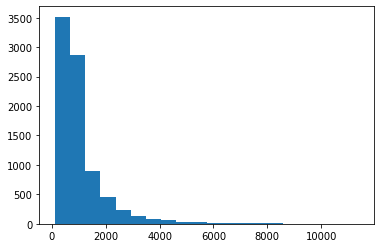

In [12]:
number_of_words_ps = df.plot_synopsis.apply(lambda x: len(x.split()))
plt.hist(number_of_words_ps, bins=20 )
plt.show()

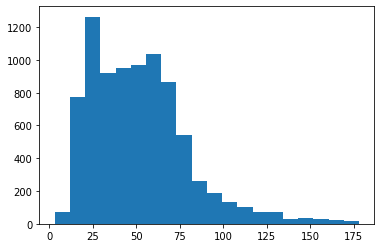

In [13]:
number_of_words_ov = df.overview.apply(lambda x: len(x.split()))
plt.hist(number_of_words_ov, bins=20 )
plt.show()

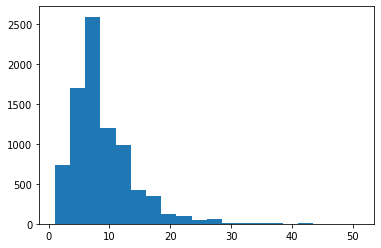

In [14]:
number_of_words_tl = df.tagline.apply(lambda x: len(x.split()))
plt.hist(number_of_words_tl, bins=20 )
plt.show()

#### From the above three graphs we can observe that all the 3 variables we are taking for further implementation are uniformely distributed with very few outlier.

#### So, finally we got 8359 entries which are valid, saving the dataframe into a csv file so that the dataset can be used for further implementation.

In [ ]:
df.to_csv('data/dataset_clean.csv')